<a href="https://colab.research.google.com/github/diegulio/Breed_Recognition-to-Buscomiperro/blob/main/validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os

import cv2
from google.colab.patches import cv2_imshow
import pickle as pkl
import matplotlib.pyplot as plt


In [ ]:
a_file = open("class_indices.pkl", "rb")
class_indices = pkl.load(a_file)
a_file.close()

# Models
Se debe descomentar el modelo que se desea seleccionar, debido a su tamaño es que se recomienda no deseleccionarlos todos

In [ ]:
#model_0 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/modelos/invv3_98_84.h5')
model_3 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/modelos/Incv3_082_087.h5')
#model_4 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/modelos/Incv3_090_087.h5')
#model_5 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/modelos/Incv3_091_087.h5')

# Validation Kaggle

In [ ]:
val = pd.read_csv('sample_submission.csv')
val['id'] += '.jpg'
val

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0

In [ ]:
def val_model(model):
  from keras_preprocessing.image import ImageDataGenerator

  val_datagen=ImageDataGenerator(rescale=1./255)
  val_generator=val_datagen.flow_from_dataframe(
  dataframe=val,
  directory="/content/drive/MyDrive/Colab Data/Proyecto buscomiperro/val",
  x_col="id",
  y_col=None,
  batch_size=1,
  seed=42,
  shuffle=False,
  class_mode=None,
  target_size=(375,500))
  STEP_SIZE_VAL=val_generator.n//val_generator.batch_size

  y_pred = model.predict(val_generator, steps=STEP_SIZE_VAL, verbose = 1)

  sample_data = pd.read_csv('sample_submission.csv')

  y_prediction = np.delete(y_pred, [0,47], axis = 1) # sin gato ni No detectado

  sample_data.iloc[:,1:] = y_prediction

  sample_data.to_csv('sub.csv', index = False)

  return None





In [ ]:
val_model(model_0)

Found 10357 validated image filenames.
10357/10357 [==============================] - 6300s 608ms/step


# Single Validation

In [ ]:
def view_probs(path_img):
  img = load_img(path_img, target_size= (375,500))
  plt.imshow(img)

  x = img_to_array(img).reshape(-1, 375, 500, 3)/255 

  pred = model_3.predict(x)[0]

  best_3 = pred.argsort()[-3:][::-1] # Se obtienen los indices de los mejores 3 valores de pred

  print('=============================')
  print('                Raza| Prob')
  print('--------------------------')
  for idx_breed in best_3:
    # Nombre de breed
    for breed, idx  in class_indices.items():
      if idx == idx_breed:
          breed_pred = breed

    print('%20s| %4.2f'%(breed_pred, pred[idx_breed]))

  print('=============================')

  return None


                Raza| Prob
--------------------------
        No detectado| 0.84
                gato| 0.06
       irish_terrier| 0.05


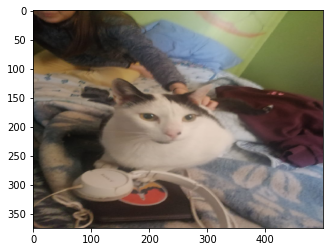

In [ ]:
path_img = '/content/mona.jpg' # El path de tu imagen
view_probs(path_img)



